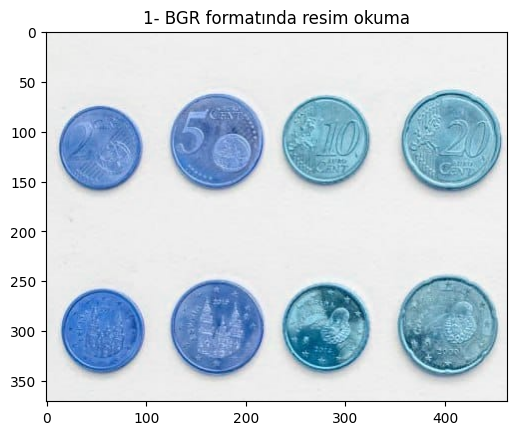

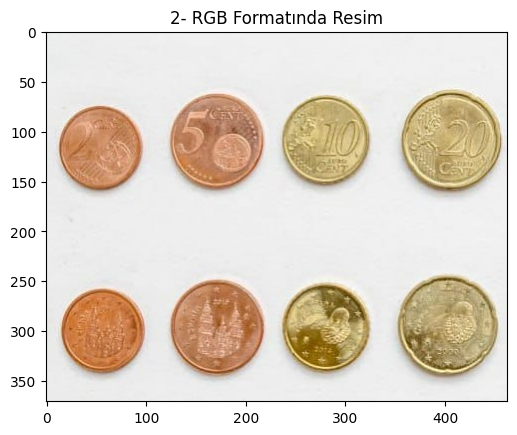

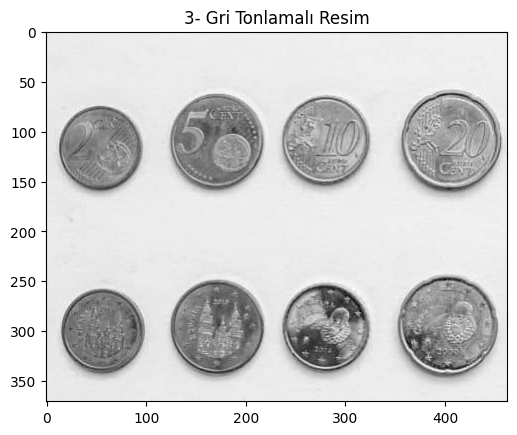

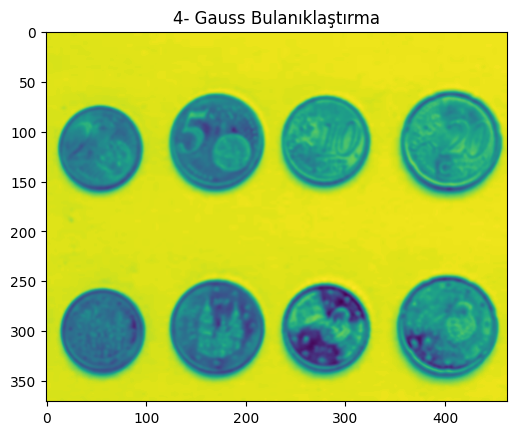

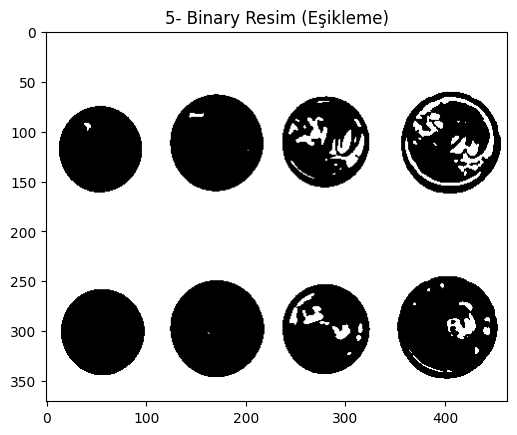

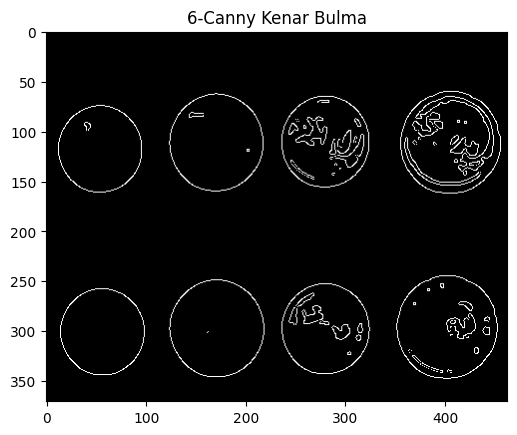

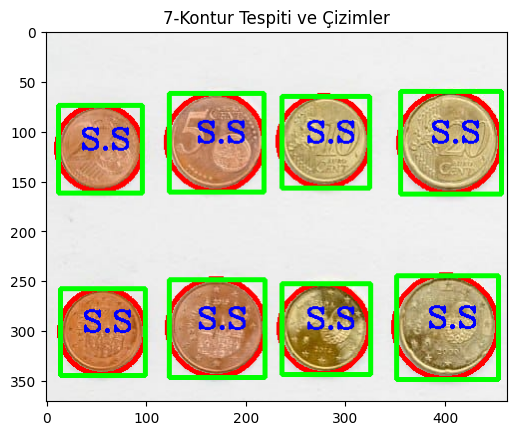

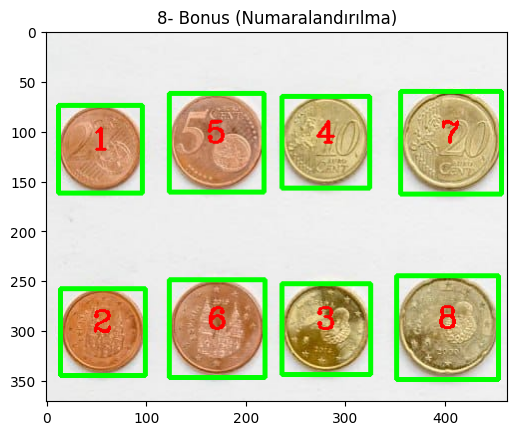

In [45]:
# BL242 Görüntü İşleme Dersi Ödev 1
# SEHER SAMSUM  /  2023688056

import cv2
import matplotlib.pyplot as plt
import numpy as np

para_bgr = cv2.imread("para.png")
plt.imshow(para_bgr)
plt.title("1- BGR formatında resim okuma")
plt.show()

para_rgb = cv2.cvtColor(para_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(para_rgb)
plt.title("2- RGB Formatında Resim")
plt.show()

gri_para = cv2.cvtColor(para_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(gri_para, cmap='gray')
plt.title("3- Gri Tonlamalı Resim")
plt.show()

bulanik_para = cv2.GaussianBlur(gri_para, (7, 7), 0)
plt.imshow(bulanik_para)
plt.title("4- Gauss Bulanıklaştırma")
plt.show()

_, binary_para = cv2.threshold(bulanik_para, 185, 255, cv2.THRESH_BINARY)
plt.imshow(binary_para, cmap='gray')
plt.title("5- Binary Resim (Eşikleme)")
plt.show()

kenar_para = cv2.Canny(binary_para, 100, 200)
plt.imshow(kenar_para, cmap='gray')
plt.title("6-Canny Kenar Bulma")
plt.show()

contours, hierarchy = cv2.findContours(kenar_para, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
kontorlu_para = para_rgb.copy()

for i, kontor in enumerate(contours):
    if cv2.contourArea(kontor) > 180:
        (x, y), radius = cv2.minEnclosingCircle(kontor)
        center = (int(x), int(y))
        radius = int(radius)
        cv2.circle(kontorlu_para, center, radius, (255, 0, 0), 4)

        x, y, w, h = cv2.boundingRect(kontor)
        cv2.rectangle(kontorlu_para, (x, y), (x + w, y + h), (0, 255, 0), 4)
        cv2.putText(kontorlu_para, "S.S", (x + w // 2 - 20, y + h // 2), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)

plt.imshow(kontorlu_para)
plt.title("7-Kontur Tespiti ve Çizimler")
plt.show()
sorted_contours = sorted(contours, key=cv2.contourArea)

kontorlu_para = para_rgb.copy()
for i, kontor in enumerate(sorted_contours[:8]):
    if cv2.contourArea(kontor) > 180:
        x, y, w, h = cv2.boundingRect(kontor)
        cv2.rectangle(kontorlu_para, (x, y), (x + w, y + h), (0, 255, 0), 4)
        cv2.putText(kontorlu_para, str(i + 1), (x + w // 2 - 10, y + h // 2), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 2)

plt.imshow(kontorlu_para)
plt.title("8- Bonus (Numaralandırılma)")
plt.show()